In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data[1:10]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
round(data.describe(),2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00    0.00   
25%           1.00    99.00          62.00           0.00     0.00   27.30   
50%           3.00   117.00          72.00          23.00    30.50   32.00   
75%           6.00   140.25          80.00          32.00   127.25   36.60   
max          17.00   199.00         122.00          99.00   846.00   67.10   

       DiabetesPedigreeFunction     Age  Outcome  
count                    768.00  768.00   768.00  
mean                       0.47   33.24     0.35  
std                        0.33   11.76     0.48  
min                        0.08   21.00     0.00  
25%                        0.24   24.00     0.00  
50%                        0.37   29.00     0.00  
75%                        0.63   41.00     1.00  
max                        2.42   81.00     1.00

In [7]:
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [8]:
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


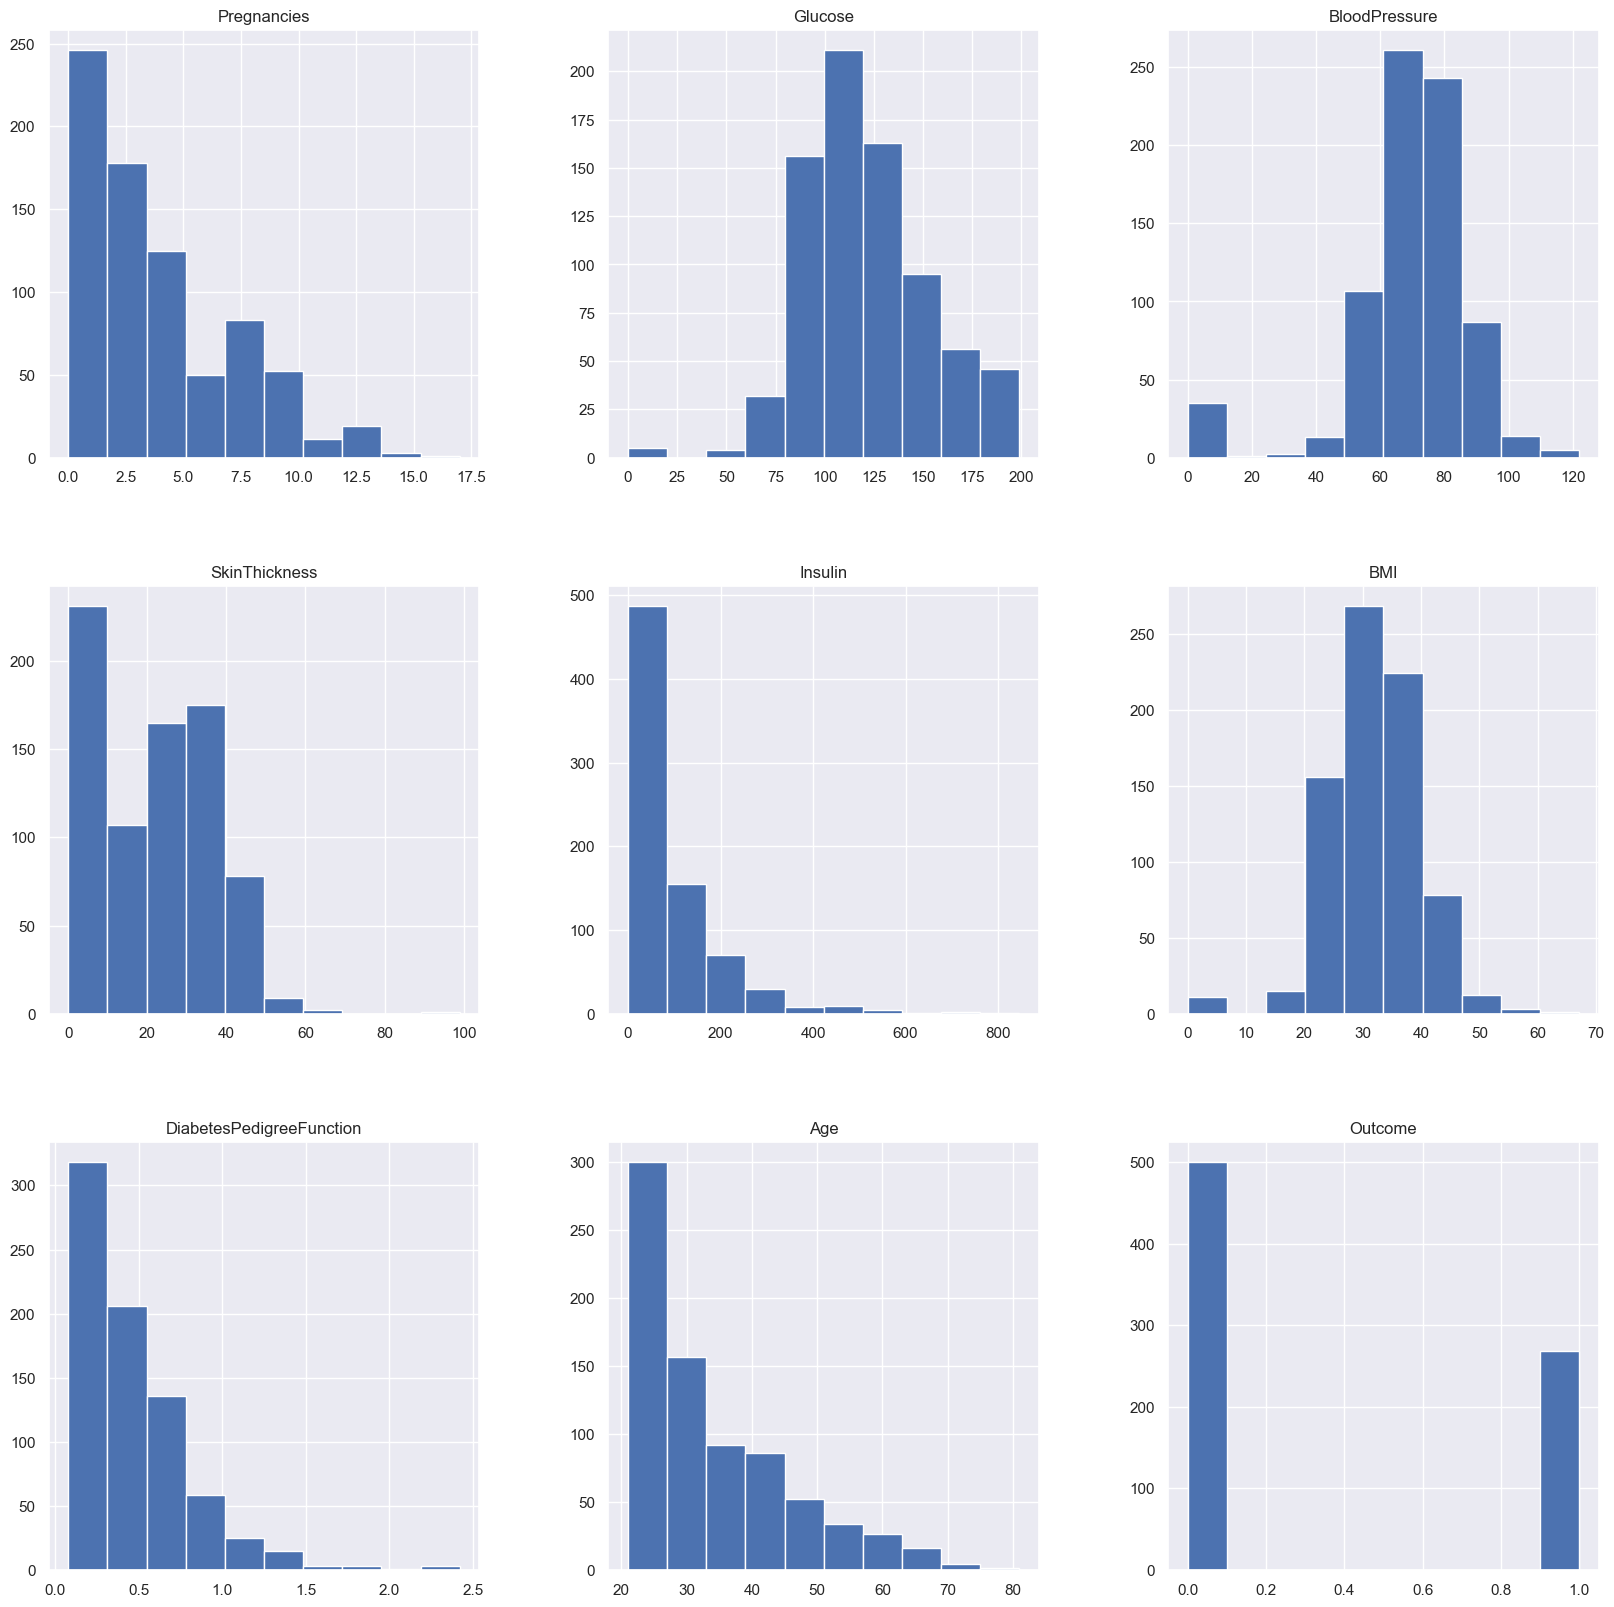

In [9]:
h = data.hist(figsize =(20,20))

In [10]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace =True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace =True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace =True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace =True)
data_copy['BMI'].fillna(data_copy['BMI'].median(),inplace =True)

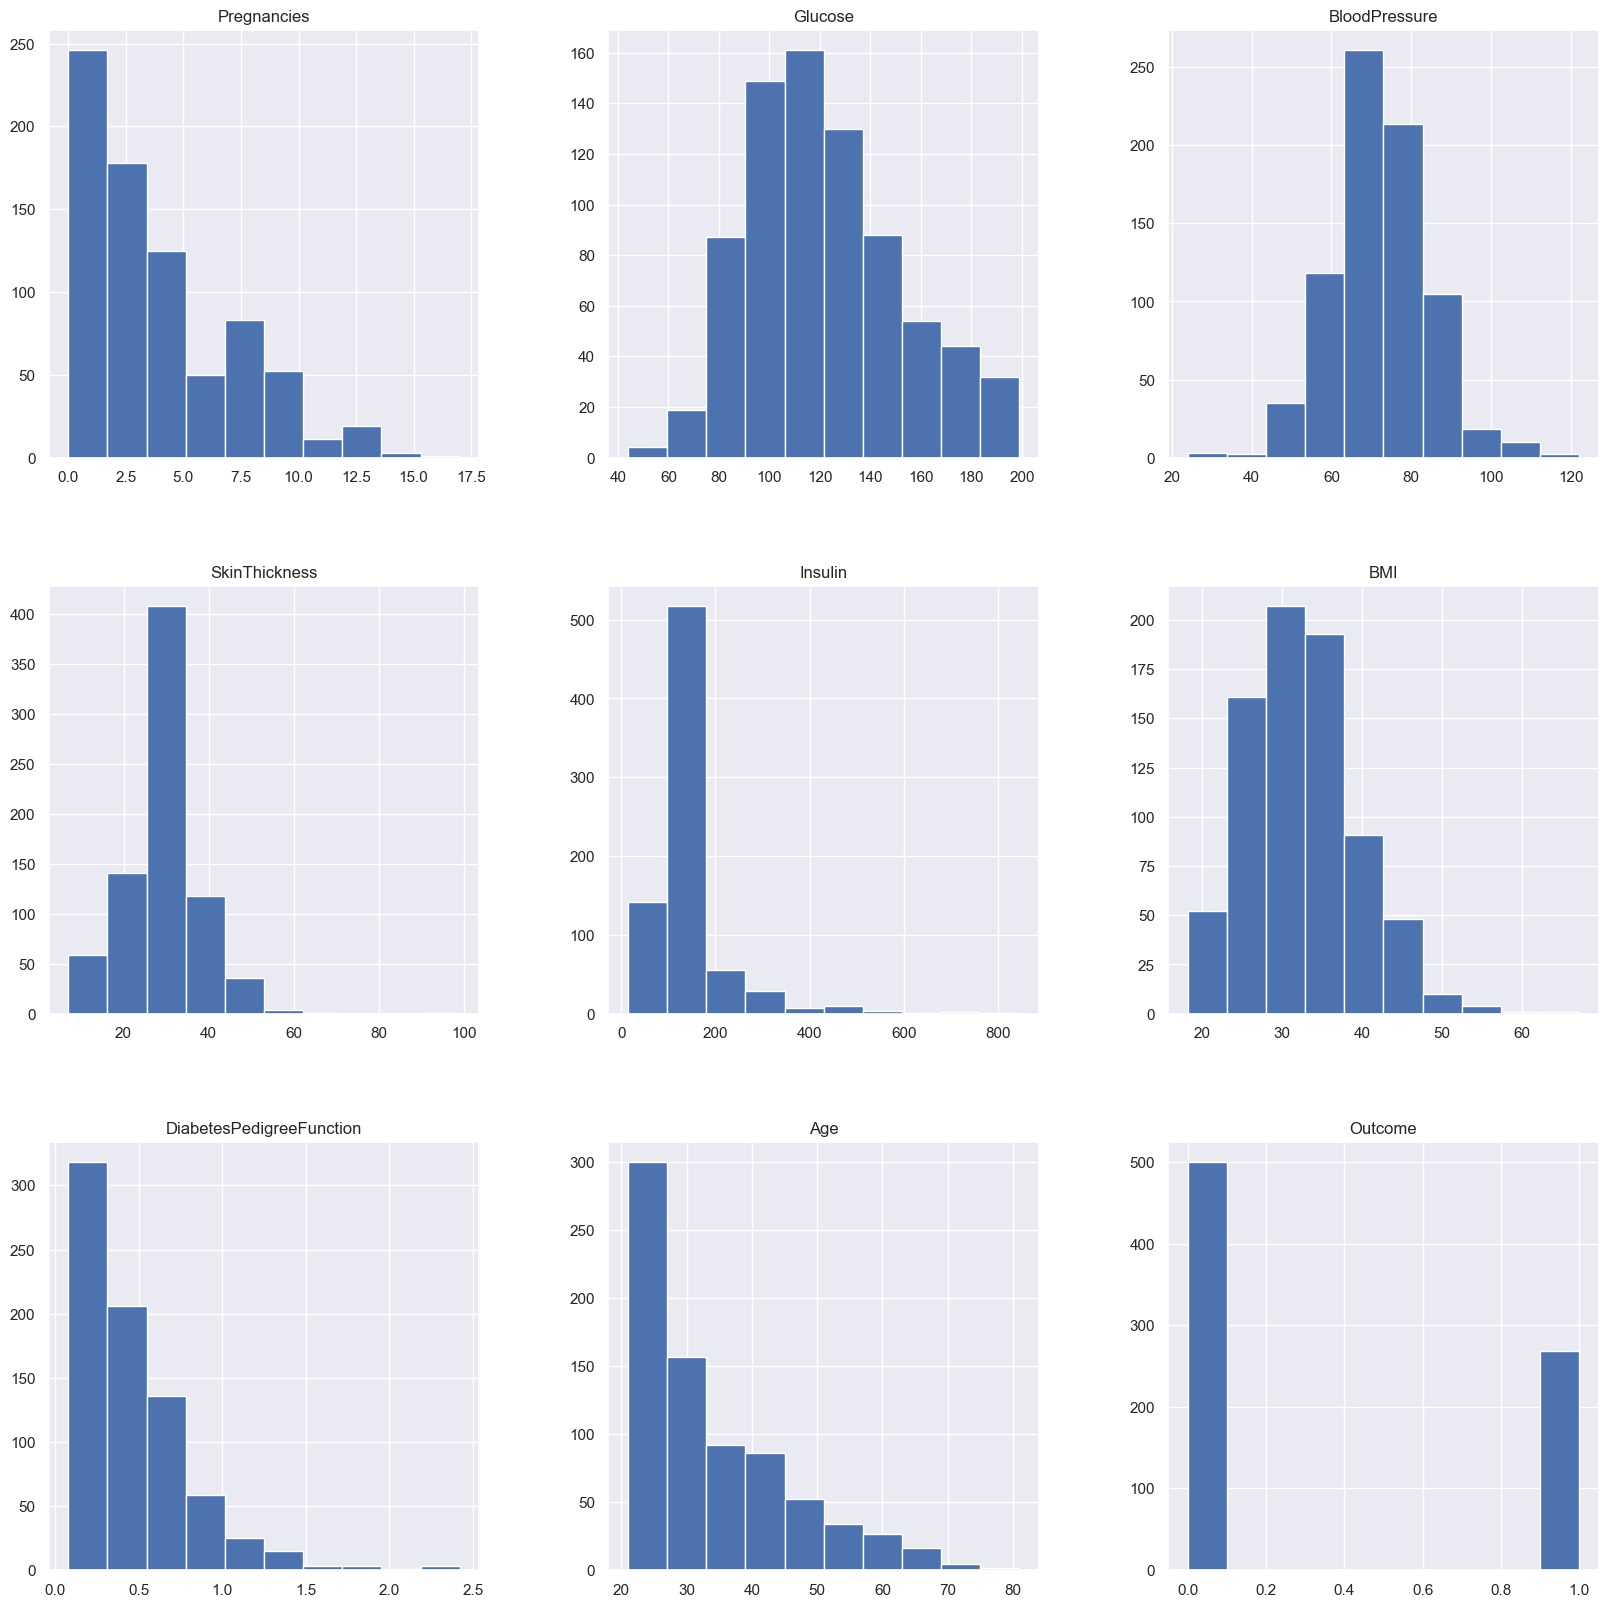

In [11]:
p = data_copy.hist(figsize =(20,20))

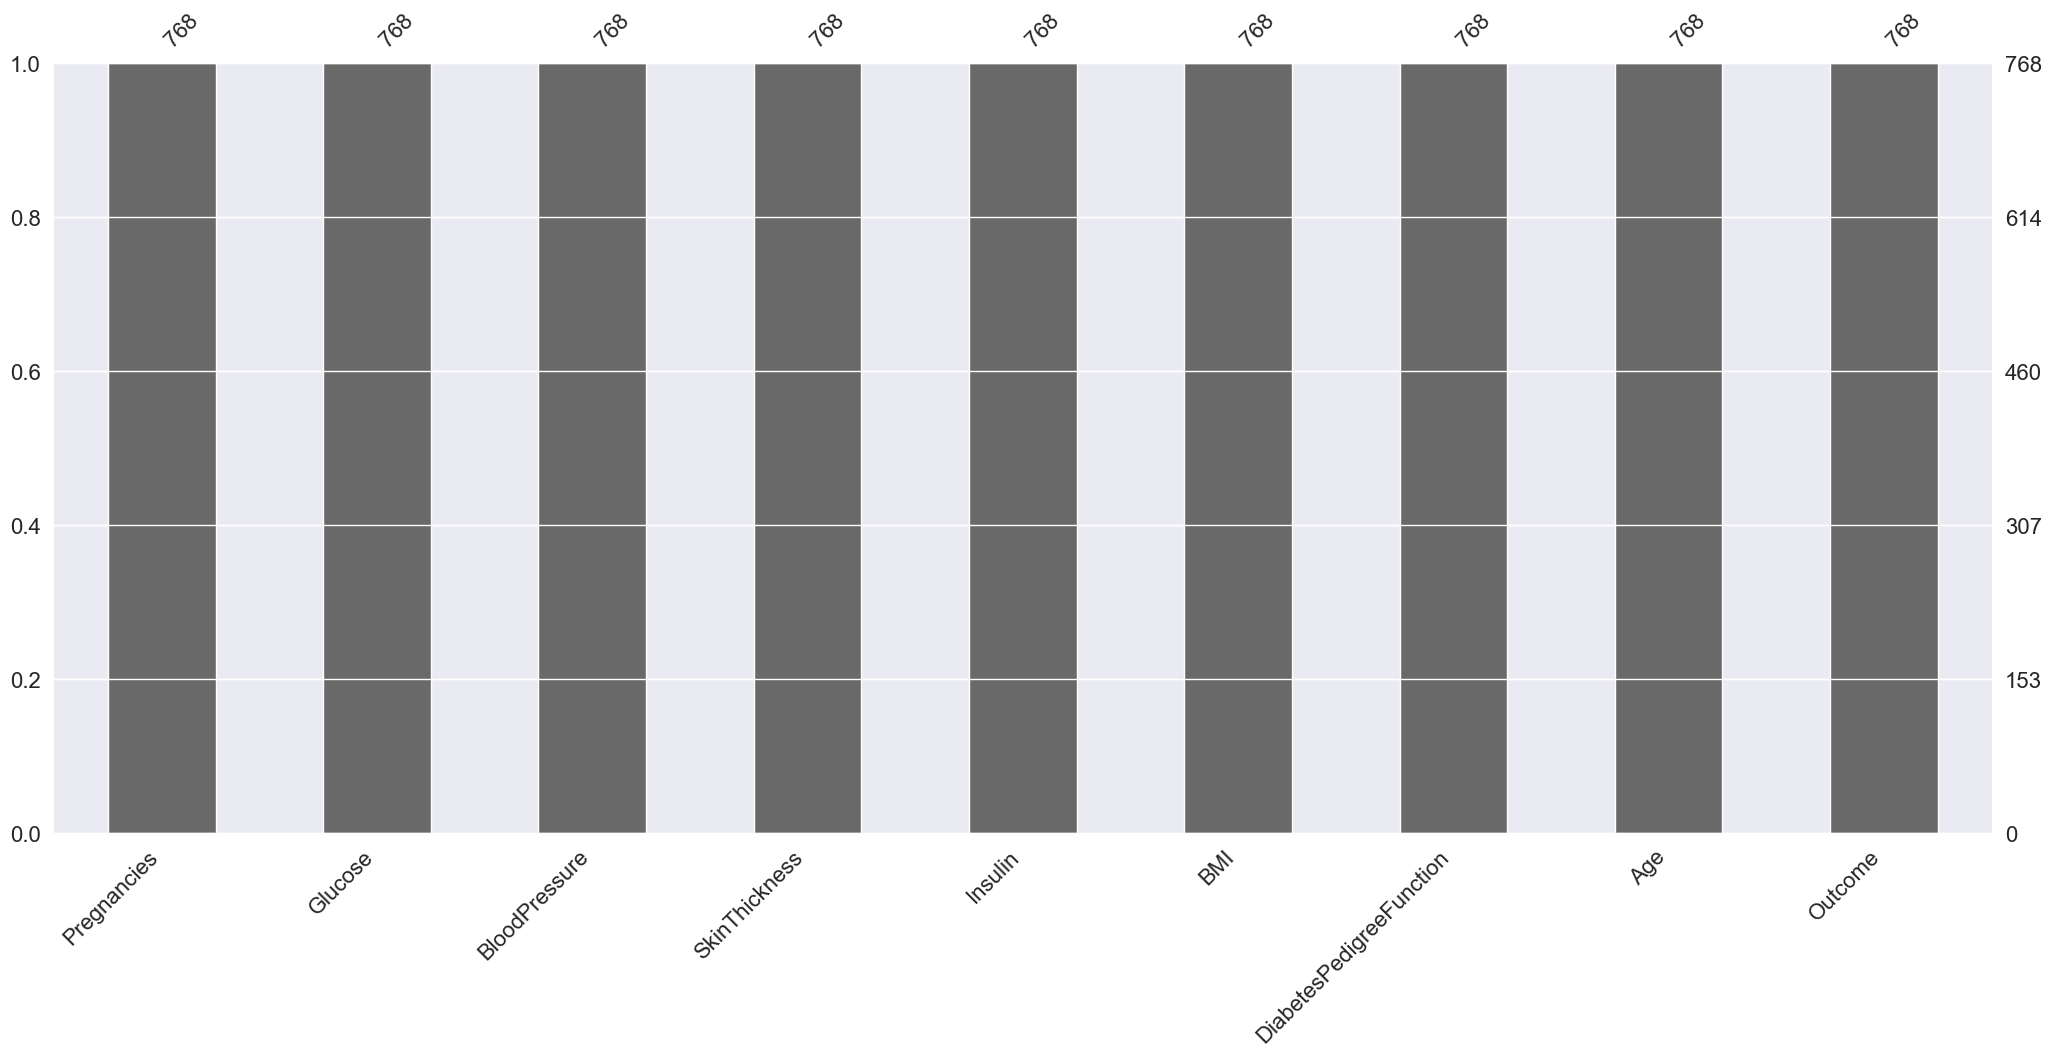

In [12]:
p = msno.bar(data)

Outcome
0    500
1    268
Name: count, dtype: int64


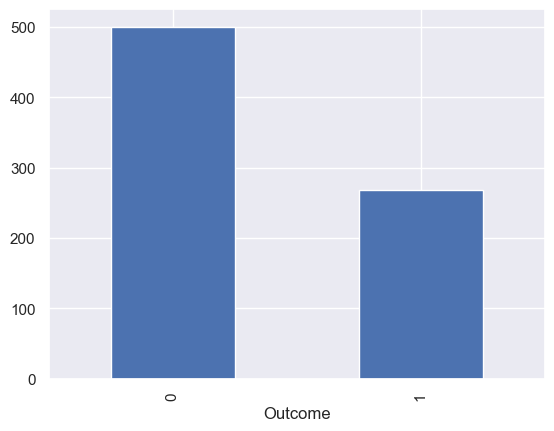

In [13]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(data.Outcome.value_counts())
p = data.Outcome.value_counts().plot(kind="bar")

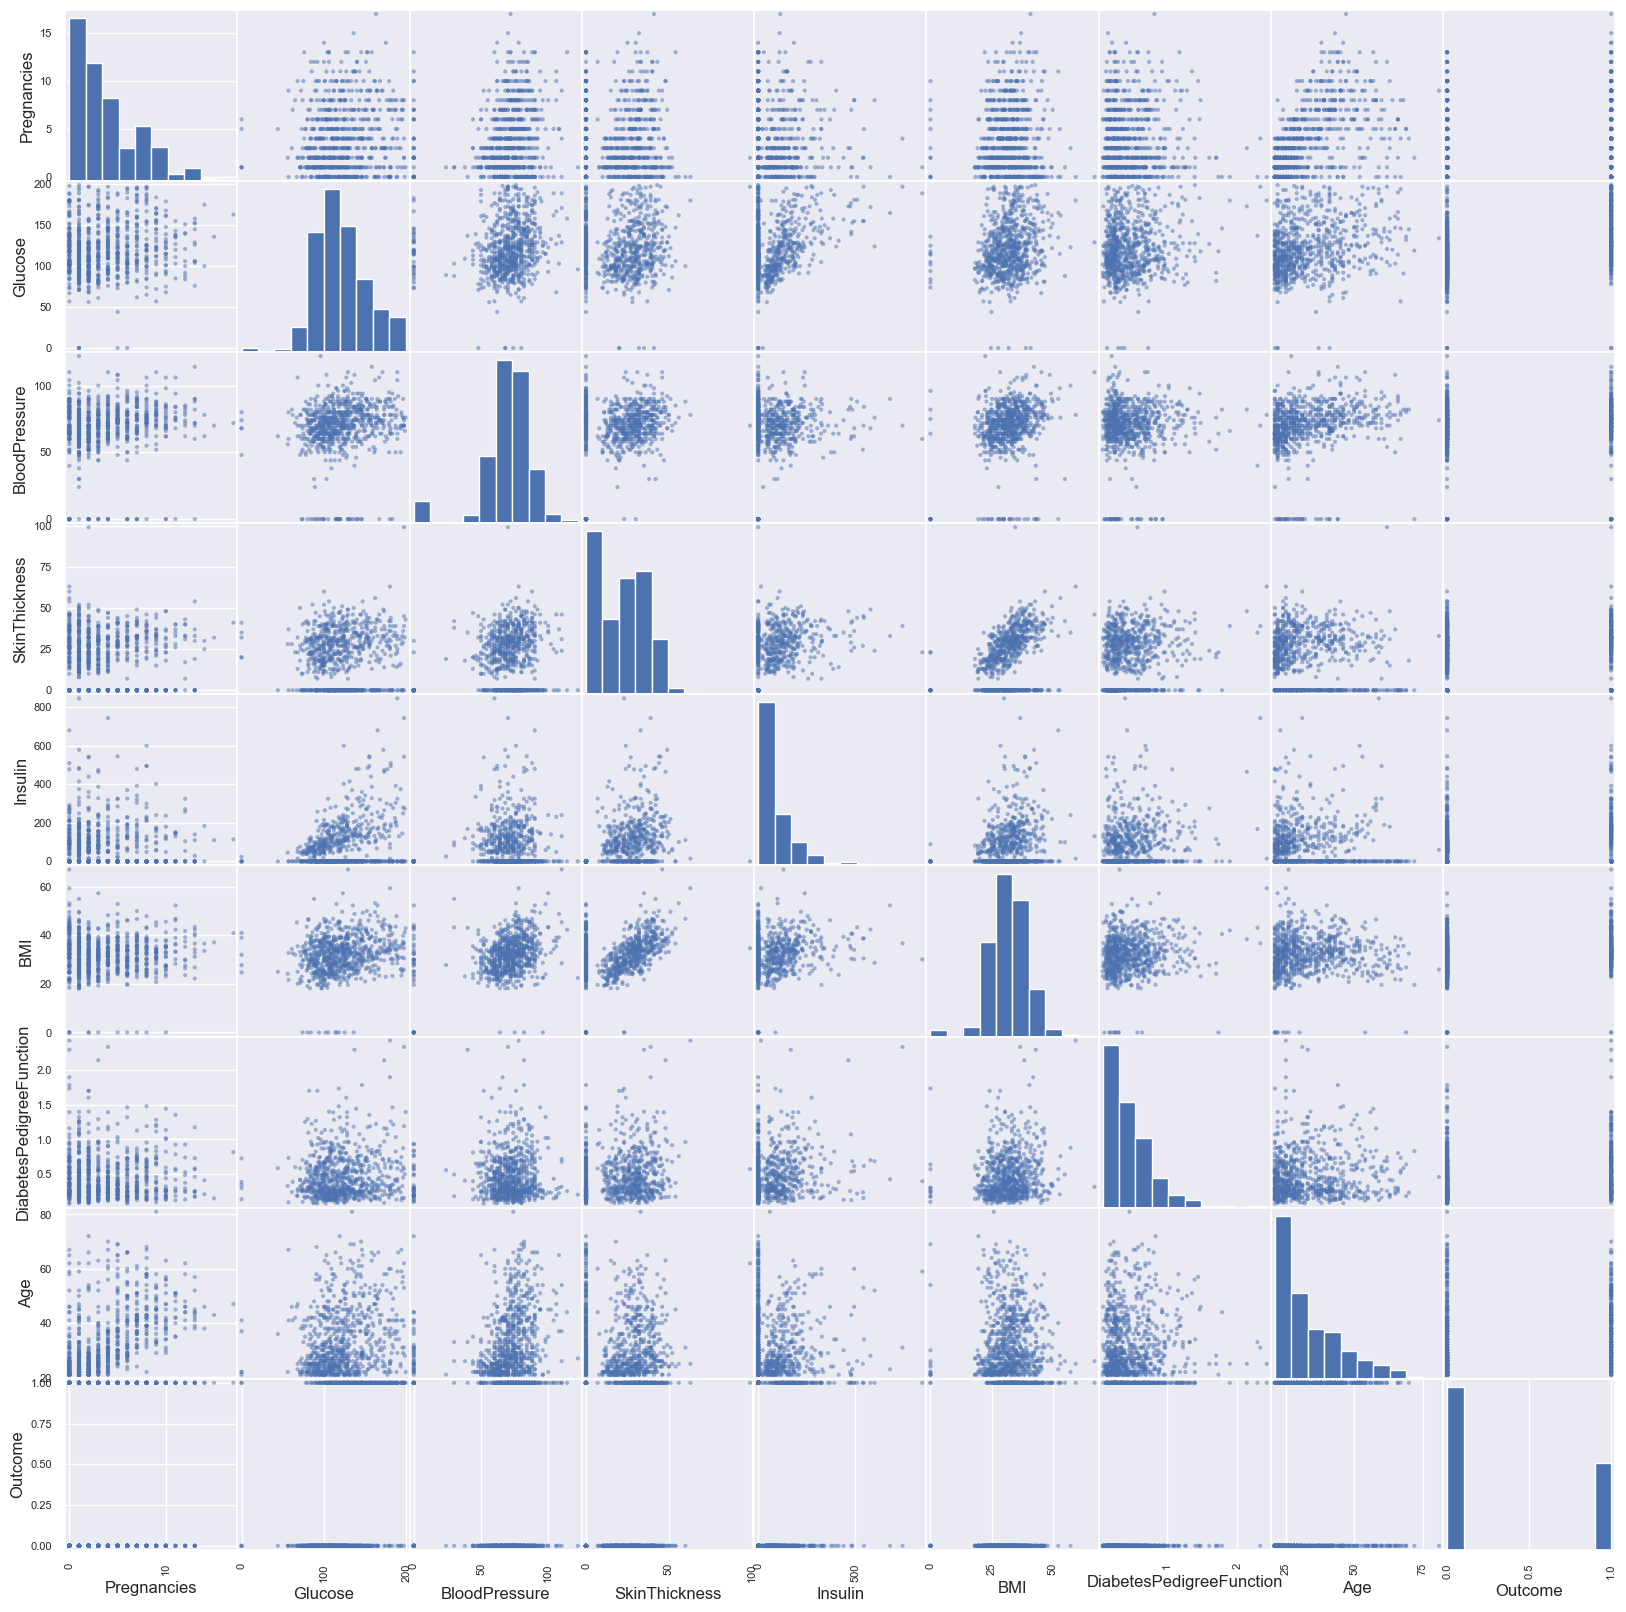

In [14]:
p = scatter_matrix(data, figsize=(20, 20))

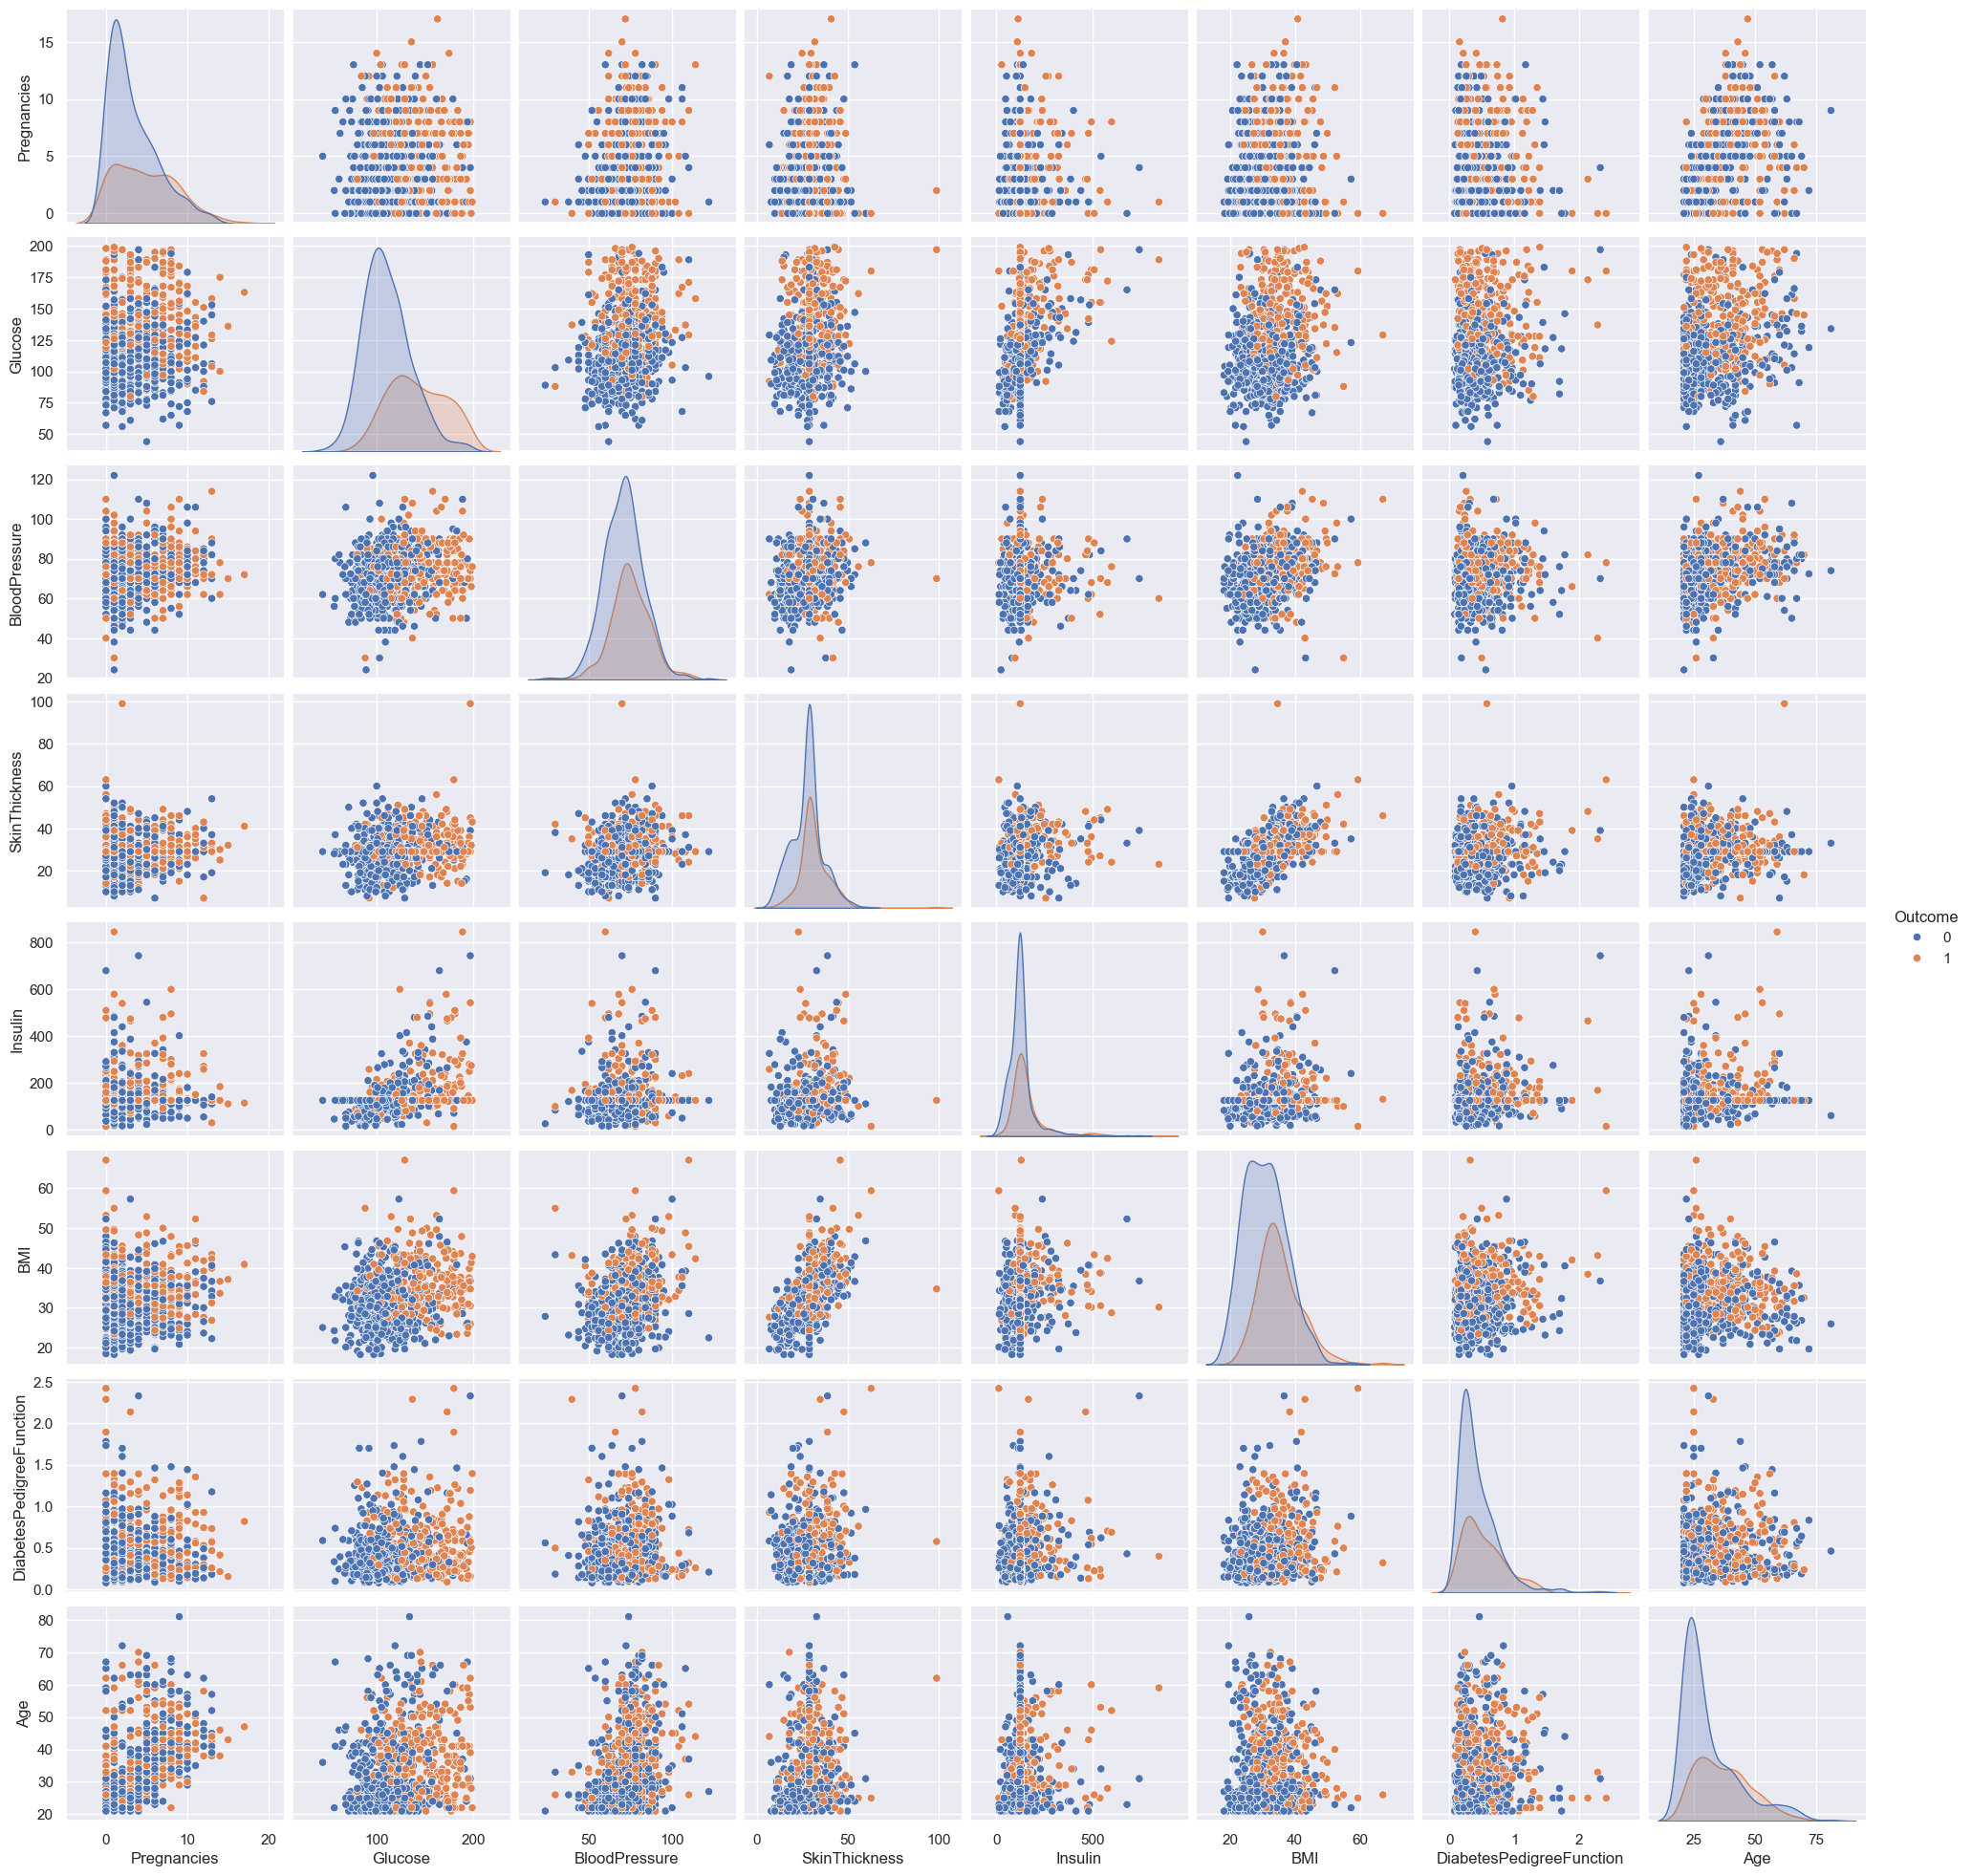

In [15]:
p = sns.pairplot(data_copy, hue='Outcome')

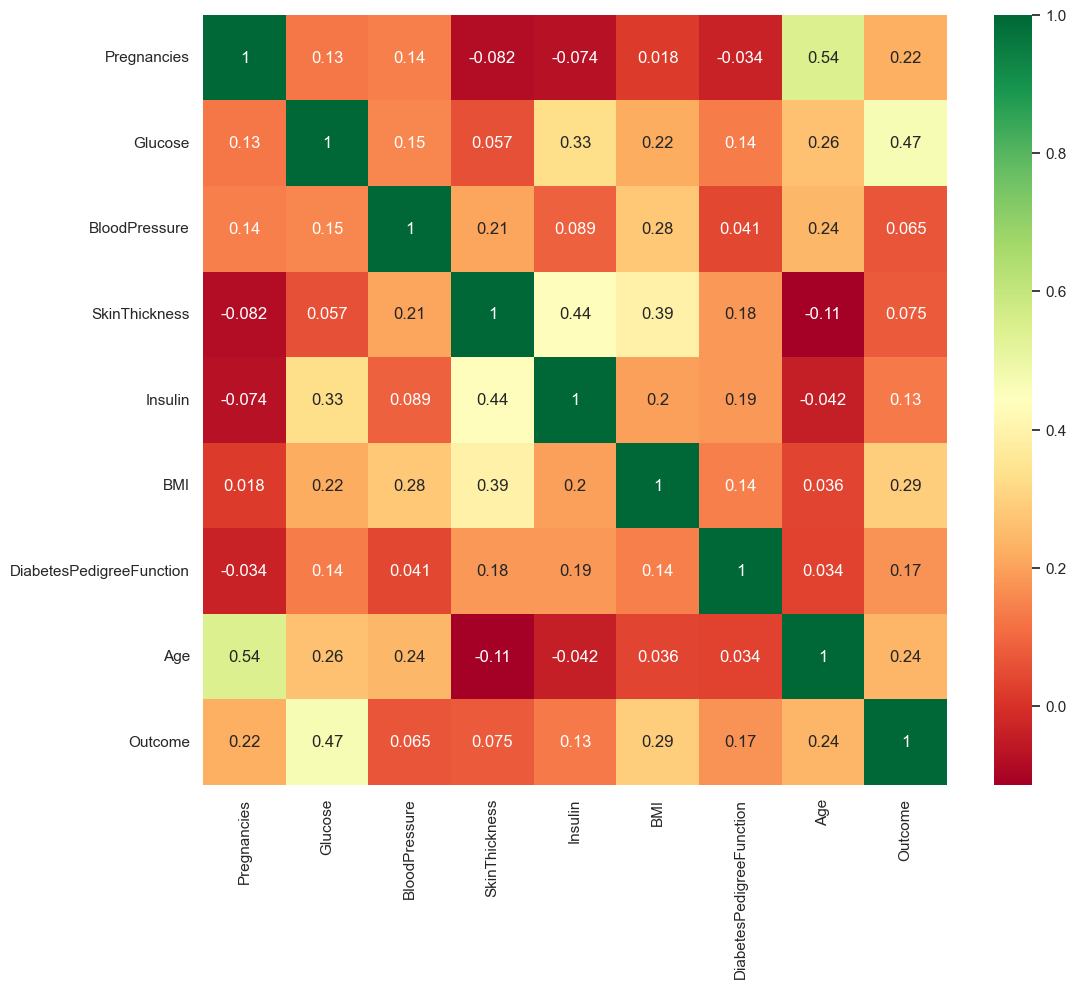

In [16]:
plt.figure(figsize=(12, 10))
p = sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

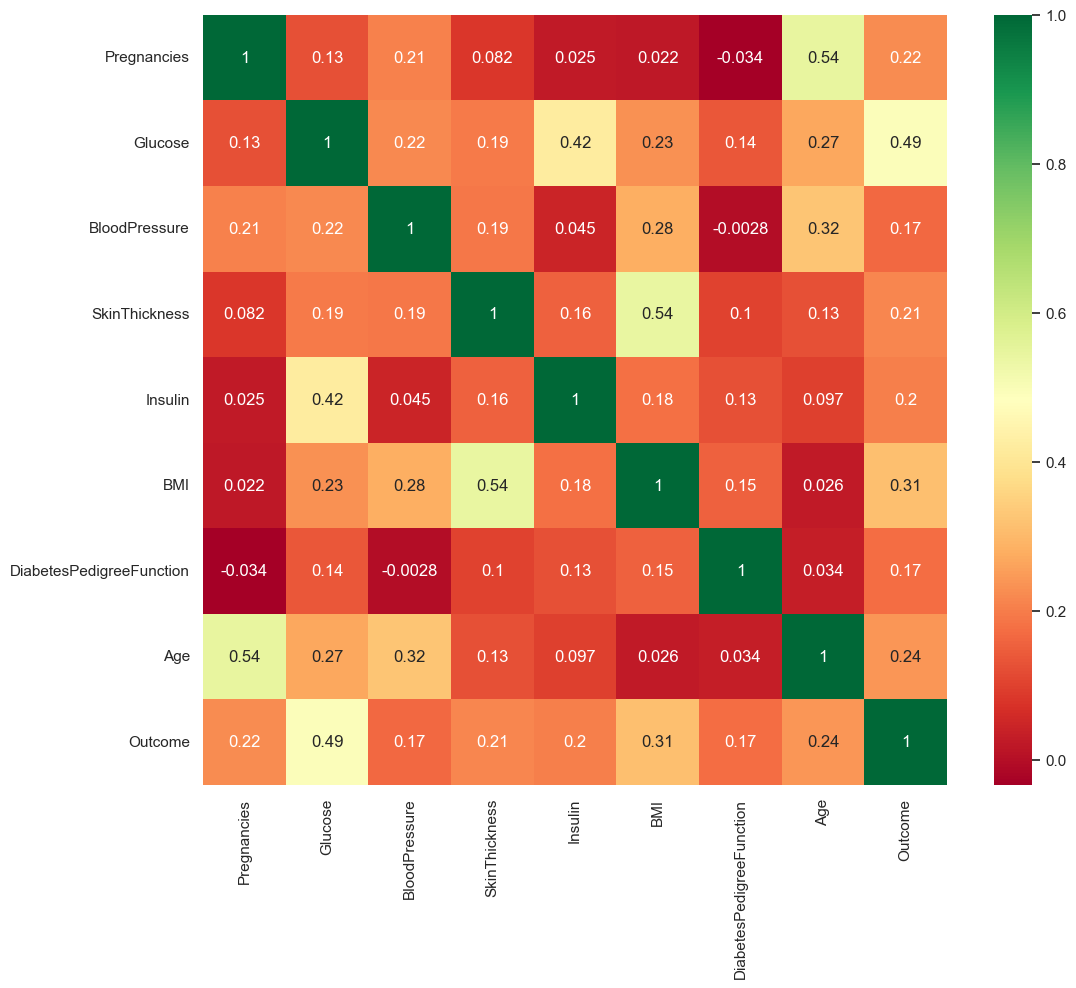

In [17]:
plt.figure(figsize=(12, 10))
p = sns.heatmap(data_copy.corr(), annot=True, cmap='RdYlGn')

In [18]:
data_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [19]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"], axis=1),),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [20]:
y = data_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)
X_train,X_test,y_train,y_test


(     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 657    -0.844885 -0.055456       0.628269       2.150354  0.687250  0.938011   
 462     1.233880 -1.567812      -0.198965       1.239762 -1.061917  0.414047   
 171     0.639947  0.404826      -0.198965      -0.695245 -0.123622  0.428601   
 210    -0.547919 -1.337671      -1.026200      -0.809069 -0.181541 -0.692100   
 147    -0.547919 -0.515738      -0.695306       0.670643 -0.251045 -0.284572   
 ..           ...       ...            ...            ...       ...       ...   
 113     0.046014 -1.502057      -0.860753      -0.012301 -0.181541  0.224838   
 556    -0.844885 -0.811634      -0.198965       1.239762 -0.181541  0.821575   
 254     2.421746 -0.976020      -0.860753      -2.516429  1.359116 -0.706654   
 647    -1.141852  1.884304      -1.853434       0.784467  0.212311  0.777911   
 107     0.046014  0.733599      -1.191647      -0.126125 -0.007783 -0.430118   
 
      DiabetesPedigreeFunc

In [22]:
test_scores = []
train_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test,y_test))

In [23]:
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [24]:
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

In [25]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score * 100, list(map(lambda x: x+1,train_scores_ind))))

Max train score 100.0 % and k = [1]


In [26]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x+1,train_scores_ind))))

Max test score 76.5625 % and k = [1]


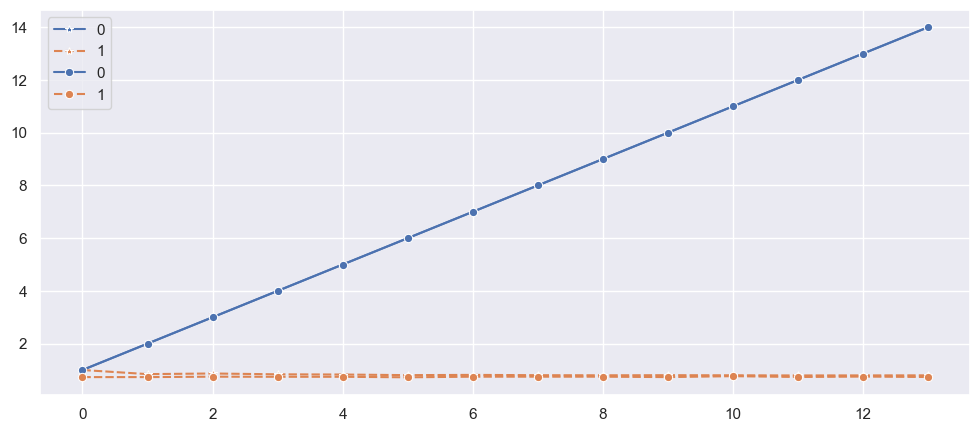

In [27]:
plt.figure(figsize=(12, 5))
p = sns.lineplot([range(1,15),train_scores],marker='*')
p = sns.lineplot([range(1,15),test_scores],marker='o')

In [28]:
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

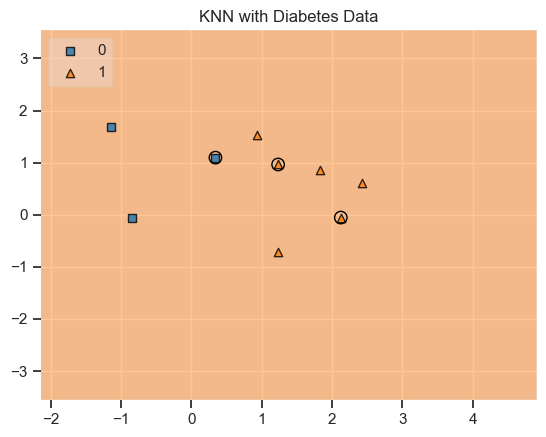

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on training data
knn.fit(X_train, y_train)

# Plot decision regions
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)
plt.title('KNN with Diabetes Data')
plt.show()

Text(0.5, 20.049999999999997, 'Predicted label')

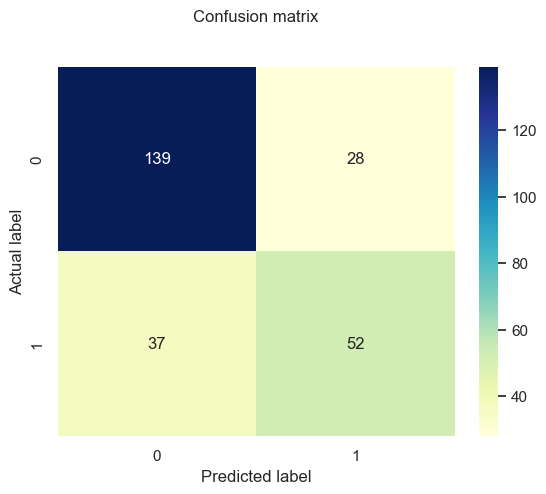

In [30]:
y_pred = knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       167
           1       0.65      0.58      0.62        89

    accuracy                           0.75       256
   macro avg       0.72      0.71      0.71       256
weighted avg       0.74      0.75      0.74       256



In [32]:
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

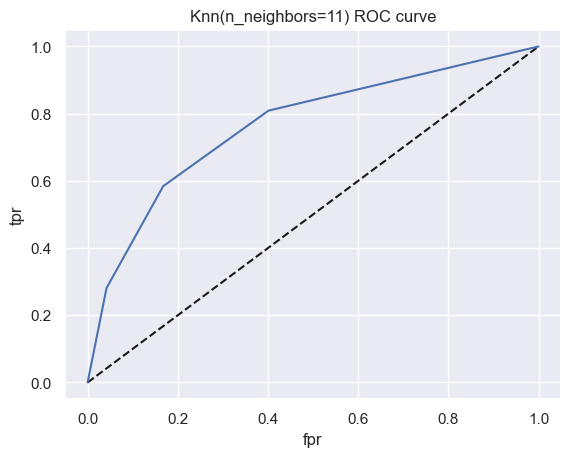

In [33]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Knn')

plt.xlabel('fpr')
plt.ylabel('tpr')

plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [34]:
roc_auc_score(y_test, y_pred_proba)

0.7645831931642333

In [35]:
# In case of Classifier like KNN the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)

print("Best Score:", str(knn_cv.best_score_))
print("Best Parameters:", str(knn_cv.best_params_))

Best Score: 0.7721840251252015
Best Parameters: {'n_neighbors': 25}


In [36]:
# Create the Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 74.22%
